# Project: Wrangling and Analyze Data

In [1148]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1149]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [1150]:
images = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [1151]:
with open('./image_predictions.tsv',mode='wb') as file:
    file.write(images.content)

In [1152]:
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1153]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [ ]:
tweets = []
with open('./tweet_json.txt',mode='r',encoding='utf-8') as file:
    while True:
        try:
            line = file.readline()
            current_tweet = json.loads(line)
            tweets.append({
            'tweet_id':current_tweet['id'],
            'retweets':current_tweet['retweet_count'],
            'favorite':current_tweet['favorite_count']
            })
        except:
            print('READ ALL LINES')
            break

In [ ]:
tweets[0]

In [ ]:
tweets = pd.DataFrame(tweets)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [ ]:
twitter_archive

In [ ]:
twitter_archive.info()

In [1154]:
twitter_archive.query('tweet_id ==744234799360020481 ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None


In [1155]:
twitter_archive[twitter_archive['name'].str.len() < 2].name

56      a
649     a
775     O
801     a
1002    a
1004    a
1017    a
1049    a
1193    a
1207    a
1340    a
1351    a
1361    a
1368    a
1382    a
1499    a
1737    a
1785    a
1853    a
1854    a
1877    a
1878    a
1923    a
1941    a
1955    a
1994    a
2034    a
2066    a
2116    a
2125    a
2128    a
2146    a
2153    a
2161    a
2191    a
2198    a
2211    a
2218    a
2222    a
2235    a
2249    a
2255    a
2264    a
2273    a
2287    a
2304    a
2311    a
2314    a
2327    a
2334    a
2347    a
2348    a
2350    a
2352    a
2353    a
2354    a
Name: name, dtype: object

In [1156]:
# since None is used in other columns
twitter_archive[twitter_archive['name'] =='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [1157]:
twitter_archive.tweet_id.duplicated().sum()

0

In [1158]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [1159]:
twitter_archive[twitter_archive.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [1160]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [1161]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1162]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [1163]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1164]:
image_predictions[image_predictions['p1_conf']>0.75]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True


In [1165]:
image_predictions.groupby('p3').count()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3_conf,p3_dog
p3,,,,,,,,,,,
Afghan_hound,4,4,4,4,4,4,4,4,4,4,4
African_chameleon,1,1,1,1,1,1,1,1,1,1,1
African_grey,1,1,1,1,1,1,1,1,1,1,1
Airedale,11,11,11,11,11,11,11,11,11,11,11
American_Staffordshire_terrier,24,24,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...
wombat,1,1,1,1,1,1,1,1,1,1,1
wood_rabbit,3,3,3,3,3,3,3,3,3,3,3
wool,3,3,3,3,3,3,3,3,3,3,3


In [1166]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   retweets  2354 non-null   int64
 2   favorite  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. timestamp and retweeted_status_timestamp columns from the twitter_archive DataFrame are columns of type Date
2. some rows in twitter_archive have weird or miscaptured name values such as only one letter 'a' or 'O'

3. also the name column in twitter_archive have None as a value opposed to Nan

4. The columns doggo, floofer, pupper, puppo have None values as opposed to Nan

5. drop rows with tweets that are retweets since they are not considered an original rating and

6. there are rows with rating_denominator other than 10 sometimes even 0 which will cause issues when calculating the rating, it's also inconsistent since the majority have it as 10 maybe these ratings weren't extracted correctly 

7. the columns expanded_urls and source are unnecessary and they clutter our data

8. most of the data has null values on the stage dropping these rows would make our data way smaller, dropping these columns is the better option
9. names with null values should be dropped 

### Tidiness issues
1. the columns doggo, floofer, pupper and puppo have seperate columns but they represent one variable which is the stage
2. the columns rating_numerator	rating_denominator should not be represented as two columns, these two should be calculated in one column since they represent the same rating variable
3. data is spread out across multiple dfs

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [1167]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
predictions_clean = image_predictions.copy()
tweets_clean = tweets.copy()

### Issue #1:

#### Define: convert the timestamp column in twitter archieve from string to Date

#### Code

In [1168]:
#convert columns to Date type
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [1169]:
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp'])

#### Test

In [1170]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:

#### Define : convert miscaptured name values in the archieve dataframe to Nan (names with only the letter 'a' or 'O')

#### Code

In [1171]:
#replacing rows with miscaptured names with null
archive_clean['name'] = archive_clean['name'].replace('a',np.nan)
archive_clean['name'] = archive_clean['name'].replace('O',np.nan)

#### Test

In [1172]:
archive_clean[archive_clean['name']=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1173]:
archive_clean[archive_clean['name']=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:

#### Define : convert  names with Name equal to 'None' in the archieve DataFrame to Nan

#### Code

In [1174]:
#replacing rows with "None" names with null
archive_clean['name'] = archive_clean['name'].replace('None',np.nan)

#### Test

In [1175]:
archive_clean[archive_clean['name']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:

#### Define :The columns doggo, floofer, pupper, puppo have None values as opposed to Nan
convert values with 'None' to Nan in the columns doggo, floofer, pupper and puppo

#### Code

In [1176]:
# replacing dog stage with None value with null
archive_clean['doggo'] = archive_clean['doggo'].replace('None',np.nan)
archive_clean['floofer'] = archive_clean['floofer'].replace('None',np.nan)
archive_clean['pupper'] = archive_clean['pupper'].replace('None',np.nan)
archive_clean['puppo'] = archive_clean['puppo'].replace('None',np.nan)


#### Test

In [1177]:
archive_clean[archive_clean['doggo']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1178]:
archive_clean[archive_clean['floofer']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1179]:
archive_clean[archive_clean['pupper']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1180]:
archive_clean[archive_clean['puppo']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:

#### Define : removing retweets since they are not considered an original rating

#### Code

In [1181]:
# remoing retweeted rows
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

#### Test

In [1182]:
archive_clean.retweeted_status_id.notnull().sum()

0

### Issue #6:

#### Define : removing all rows with rating_denominator other than 10 from the archieve DataFrame

#### Code

In [1183]:
archive_clean= archive_clean[archive_clean['rating_denominator'] == 10 ]

#### Test

In [1184]:
archive_clean.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

In [1185]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   int64           

### Issue #7:

#### Define : remove unnecessary columns from archieve dataframe

#### Code

In [1186]:
# adding columns to a list and dropping them from the df
to_be_dropped = ['source','expanded_urls','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
archive_clean.drop(to_be_dropped,axis=1,inplace=True)

#### Test

In [1187]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   int64              
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   text                2153 non-null   object             
 3   rating_numerator    2153 non-null   int64              
 4   rating_denominator  2153 non-null   int64              
 5   name                1434 non-null   object             
 6   doggo               87 non-null     object             
 7   floofer             10 non-null     object             
 8   pupper              234 non-null    object             
 9   puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 185.0+ KB


### Issue #8:

#### Define : remove the stage columns since they are mostly null

#### Code

In [1188]:
# dropping columns
archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test

In [1189]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   int64              
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   text                2153 non-null   object             
 3   rating_numerator    2153 non-null   int64              
 4   rating_denominator  2153 non-null   int64              
 5   name                1434 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 117.7+ KB


### Issue #9:

#### Define : remove rows with null dog names

#### Code

In [1190]:
# drop rows with null names
archive_clean = archive_clean[archive_clean.name.notnull()]

#### Test

In [1191]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 2349
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1434 non-null   int64              
 1   timestamp           1434 non-null   datetime64[ns, UTC]
 2   text                1434 non-null   object             
 3   rating_numerator    1434 non-null   int64              
 4   rating_denominator  1434 non-null   int64              
 5   name                1434 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 78.4+ KB


### Tidiness issues

### Issue #10:

#### Define : calculate rating in on column rather than having rating_numerator and rating_denominator columns

#### Code

In [1192]:
# caluclate rating
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

In [1193]:
# drop rating_numerator and rating_denominator since they are no longer needed
archive_clean.drop(columns=['rating_numerator','rating_denominator'],inplace=True)

#### Test

In [1194]:
archive_clean['rating'] 

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2326    0.2
2333    0.9
2345    1.0
2346    0.8
2349    0.2
Name: rating, Length: 1434, dtype: float64

### Issue #11:

#### Define : merge datafremes

#### Code

In [1195]:
# first merge of dataframes
first_merge = pd.merge(archive_clean,predictions_clean,how='inner')

In [1196]:
tweets_clean

,tweet_id,retweets,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [1197]:
# seconds merge of dataframes
twitter_archive_master = pd.merge(first_merge,tweets_clean,how='inner')

#### Test

In [1198]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1386
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   1387 non-null   int64              
 1   timestamp  1387 non-null   datetime64[ns, UTC]
 2   text       1387 non-null   object             
 3   name       1387 non-null   object             
 4   rating     1387 non-null   float64            
 5   jpg_url    1387 non-null   object             
 6   img_num    1387 non-null   int64              
 7   p1         1387 non-null   object             
 8   p1_conf    1387 non-null   float64            
 9   p1_dog     1387 non-null   bool               
 10  p2         1387 non-null   object             
 11  p2_conf    1387 non-null   float64            
 12  p2_dog     1387 non-null   bool               
 13  p3         1387 non-null   object             
 14  p3_conf    1387 non-null   float64            
 15  p3_d

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [1206]:
#extract dataframe to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [1200]:
# gettings the index of varoiues rows
most_retweeted_index= twitter_archive_master.retweets.idxmax()
most_favorite_index = twitter_archive_master.favorite.idxmax()
highest_rating = twitter_archive_master.rating.idxmax()
lowest_rating = twitter_archive_master.rating.idxmin()

In [1201]:
twitter_archive_master.iloc[most_retweeted_index]

tweet_id                                    807106840509214720
timestamp                            2016-12-09 06:17:20+00:00
text         This is Stephan. He just wants to help. 13/10 ...
name                                                   Stephan
rating                                                     1.3
jpg_url      https://pbs.twimg.com/ext_tw_video_thumb/80710...
img_num                                                      1
p1                                                   Chihuahua
p1_conf                                                0.50537
p1_dog                                                    True
p2                                                  Pomeranian
p2_conf                                               0.120358
p2_dog                                                    True
p3                                                 toy_terrier
p3_conf                                               0.077008
p3_dog                                                 

In [1202]:
twitter_archive_master.iloc[most_favorite_index]

tweet_id                                    879415818425184262
timestamp                            2017-06-26 19:07:24+00:00
text         This is Duddles. He did an attempt. 13/10 some...
name                                                   Duddles
rating                                                     1.3
jpg_url      https://pbs.twimg.com/ext_tw_video_thumb/87941...
img_num                                                      1
p1                                            English_springer
p1_conf                                               0.383404
p1_dog                                                    True
p2                                                 Boston_bull
p2_conf                                               0.134967
p2_dog                                                    True
p3                                                    Cardigan
p3_conf                                               0.110481
p3_dog                                                 

In [1203]:
twitter_archive_master.iloc[highest_rating]

tweet_id                                    749981277374128128
timestamp                            2016-07-04 15:00:45+00:00
text         This is Atticus. He's quite simply America af....
name                                                   Atticus
rating                                                   177.6
jpg_url        https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
img_num                                                      1
p1                                                     bow_tie
p1_conf                                               0.533941
p1_dog                                                   False
p2                                                  sunglasses
p2_conf                                               0.080822
p2_dog                                                   False
p3                                                    sunglass
p3_conf                                               0.050776
p3_dog                                                 

In [1204]:
twitter_archive_master.iloc[lowest_rating]

tweet_id                                    678424312106393600
timestamp                            2015-12-20 03:58:55+00:00
text         This is Crystal. She's a shitty fireman. No se...
name                                                   Crystal
rating                                                     0.2
jpg_url        https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg
img_num                                                      1
p1                                                 Maltese_dog
p1_conf                                               0.759945
p1_dog                                                    True
p2                                                  toy_poodle
p2_conf                                               0.101194
p2_dog                                                    True
p3                                                    Shih-Tzu
p3_conf                                               0.056037
p3_dog                                                 

### Insights:
1. The most retweeted (56625 retweets) tweet is of a dog called Stephan, the dog's breed is Chihuahua with 50% confidence, and a rating of 1.3 ~ 130%

2. The most favorited (107956 favorites) tweet belongs to Duddles with 39% confidence of being English Springer  

3. Atticus is the highest rated dog with a whopping 177.6 ~ 17760% rating, with 2772 and 5569 retweets and favorites respectively

4. Crystal is the lowest rated dog with 75% confidence of being Maltese dog

### Visualization

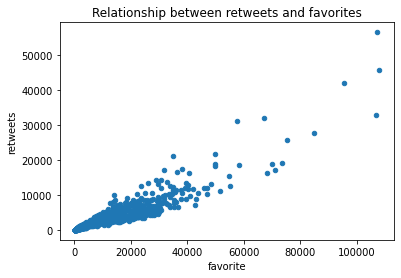

In [1205]:
twitter_archive_master.plot(kind='scatter',x='favorite',y='retweets');
plt.title('Relationship between retweets and favorites');